# Predicting Heart Failure Survival with Machine Learning

Machine Learning has founds it's way into many domains and Healthcare is one such domain. In this project, machine learning is used to predict the survival of Heart Failure patients based on medical records. To this end, this is considered as a Binary classification problem where either patient died(1) or patient survived(0).

#### Dataset Overview
* The dataset consists of medical records of 299 heart failure patients collected at Faisalabad Institute of Cardiology and Allied Hospital in Faisalabad, Punjab, Pakistan, during April–December 2015. 
* The dataset also contains 12 features including clinical, body, and lifestyle information.
* Binary features: anaemia, high blood pressure, diabetes, sex, and smoking.
* Death event feature used as target in binary classification study, indicating if the patient died or survived during the follow-up period (130 days on average).

This notebook performs **Exploratory Data Anlaysis** and **Machine Learning Model Training** for the acquired dataset and outputs the best performing model with evaluation metrics.

The final model can be used to classify the heart-failure patients for the unseen dataset.

### Importing necessary packages

**pandas**, **numpy** packages are used for basic data analysis.
**matplotlib**, **seaborn packages** are used for data visualization.
**sklearn** packages are used for training ML models for classification, creating  classification report, computing accuracy scores and confusion matrix.

In [82]:
import numpy as np
import pandas as pd 
import os

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## Exploration Data Analysis (EDA)
In this section, we first load the dataset and print the characteristics of the dataset

In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Size of the dataset
df.shape

(299, 13)

In [5]:
# Features of the dataset
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [46]:
# Dtype of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
# Check for null values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
# Statistics of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [79]:
df[df.DEATH_EVENT == 0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,203.0,58.761906,10.637890,40.0,50.0,60.0,65.0,90.0
anaemia,203.0,0.408867,0.492840,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,203.0,540.054187,753.799572,30.0,109.0,245.0,582.0,5209.0
diabetes,203.0,0.418719,0.494569,0.0,0.0,0.0,1.0,1.0
ejection_fraction,203.0,40.266010,10.859963,17.0,35.0,38.0,45.0,80.0
high_blood_pressure,203.0,0.325123,0.469579,0.0,0.0,0.0,1.0,1.0
platelets,203.0,266657.489901,97531.202283,25100.0,219500.0,263000.0,302000.0,850000.0
serum_creatinine,203.0,1.184877,0.654083,0.5,0.9,1.0,1.2,6.1
serum_sodium,203.0,137.216749,3.982923,113.0,135.5,137.0,140.0,148.0
sex,203.0,0.650246,0.478071,0.0,0.0,1.0,1.0,1.0


In [80]:
df[df.DEATH_EVENT == 1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,96.0,65.215281,13.214556,42.0,55.000,65.0,75.00,95.0
anaemia,96.0,0.479167,0.502188,0.0,0.000,0.0,1.00,1.0
creatinine_phosphokinase,96.0,670.197917,1316.580640,23.0,128.750,259.0,582.00,7861.0
diabetes,96.0,0.416667,0.495595,0.0,0.000,0.0,1.00,1.0
ejection_fraction,96.0,33.468750,12.525303,14.0,25.000,30.0,38.00,70.0
high_blood_pressure,96.0,0.406250,0.493710,0.0,0.000,0.0,1.00,1.0
platelets,96.0,256381.044792,98525.682856,47000.0,197500.000,258500.0,311000.00,621000.0
serum_creatinine,96.0,1.835833,1.468562,0.6,1.075,1.3,1.90,9.4
serum_sodium,96.0,135.375000,5.001579,116.0,133.000,135.5,138.25,146.0
sex,96.0,0.645833,0.480771,0.0,0.000,1.0,1.00,1.0


## Data Visualization
In this section, we plot the follwing,
* Distrubution of each feature using a DropDown widget.
* One big plot containing the distribution of each feature.
* Plot depicting corelation between features with respect to each other and the target.

In [74]:
# Define a function to plot the selected feature
def plot_feature(feature):
    plt.figure(figsize=(10,6))
    df[feature].hist(bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency');

# Create a dropdown widget with the dataframe's column names
dropdown = widgets.Dropdown(options=df.columns, description='Feature:')

# Use the interact function to create the widget and the plot
widgets.interact(plot_feature, feature=dropdown);

interactive(children=(Dropdown(description='Feature:', options=('age', 'anaemia', 'creatinine_phosphokinase', …

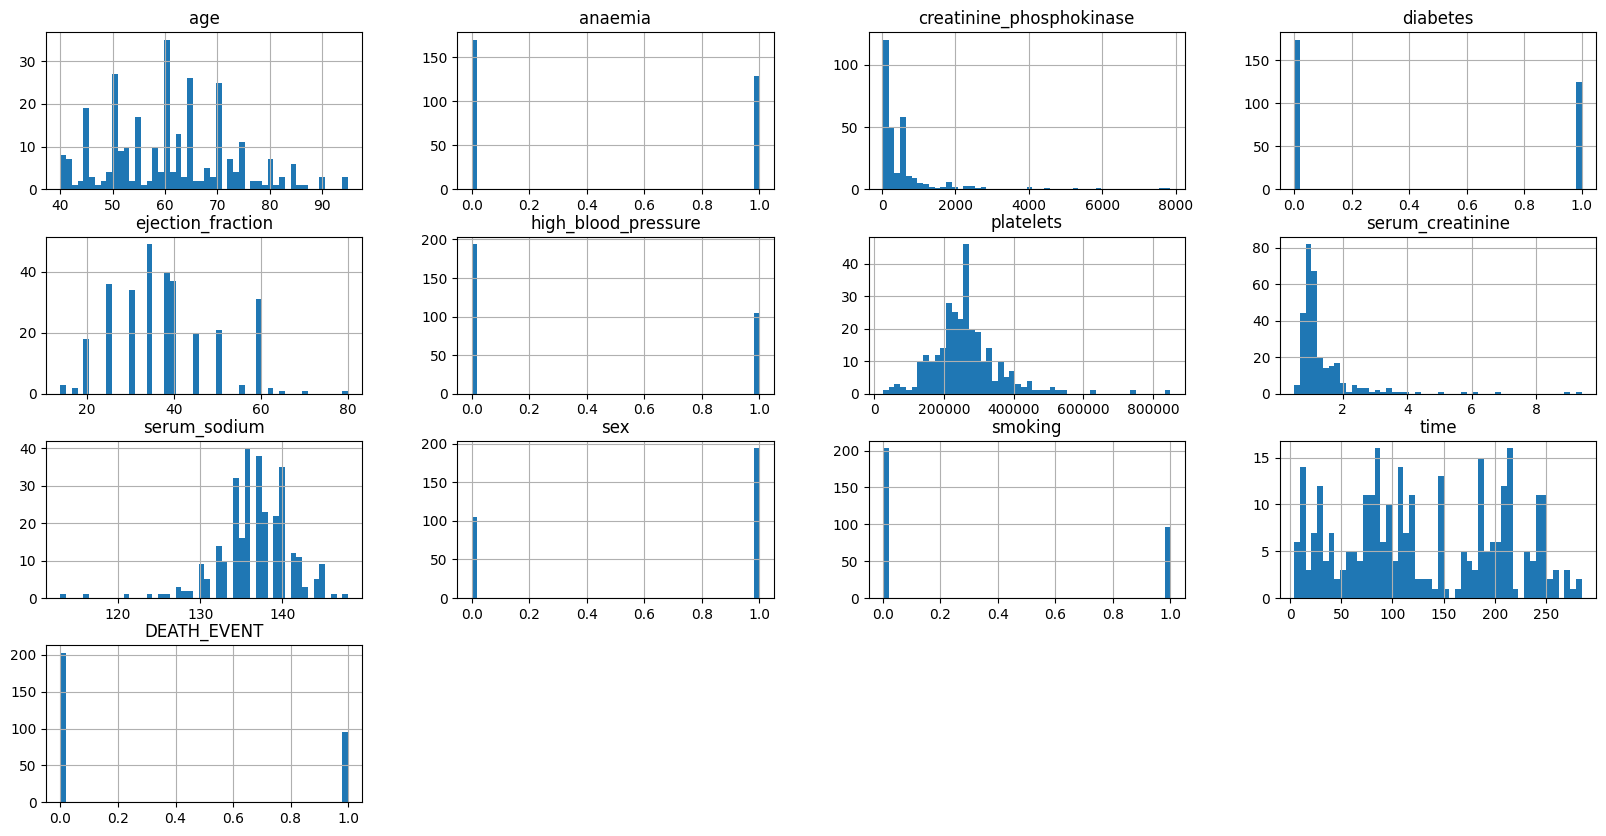

In [75]:
df.hist(figsize=(20,10),bins=50)
plt.show()

In [81]:
# sns.displot(df, x="age", hue='DEATH_EVENT', kde=True)
# plt.title("Age Distribution", fontsize = 14)
# plt.show()

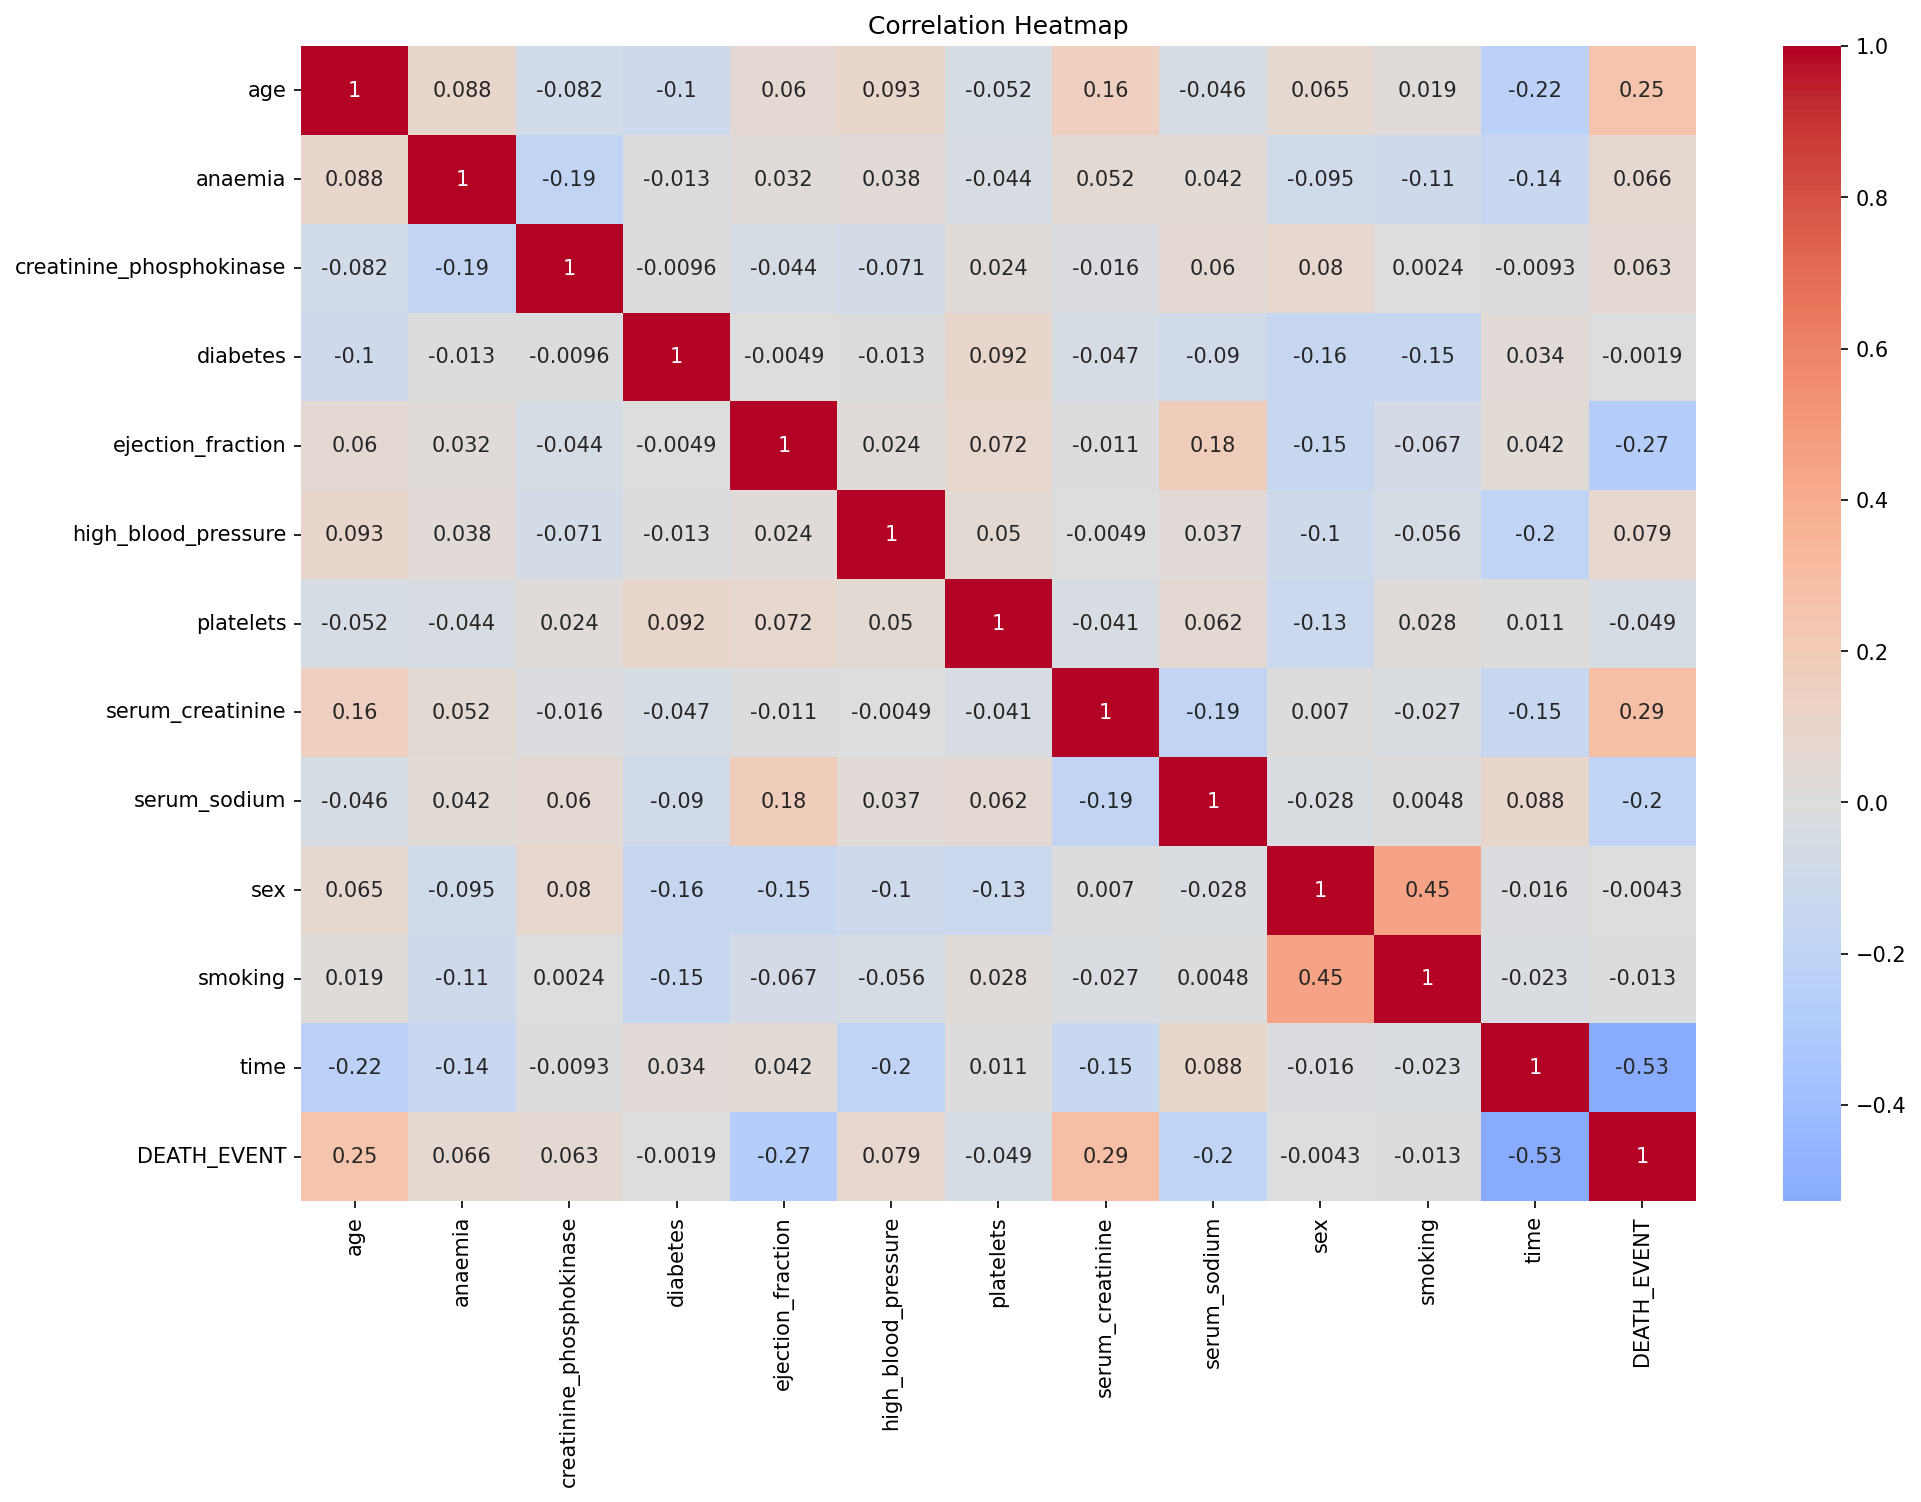

In [16]:
corr_matrix = df.corr()

# Set up the heatmap
plt.figure(figsize=(15, 10), dpi=150)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap");

From the above statistics and plots, below are the important takeaways,
* Patients between the age 50 and 70 are more prone to heart problems.
* The dataset is imbalanced as we can see that, patients with Anaemia, Diabetes, Blood Pressure, Smoking habit is higher. Also, with regards to the target DEATH_EVENT, the dataset is imbalanced as there are twice the number of patients who survived than who died.
* Patient having platelet count in the range of 20k - 30k are more prone to heart problems.
* The average follow-up period of patients who have died is close to 70 days. These patients also exhibit high Blood Pressure, Anaemia and also Creatinine phosphokinase ezyme level, possibily indicating heart failure or injury with high levels. 
* The average Serum creatinine level indicating kidney function is also seen higher in patients who have died.
* The correlation heatmap does not provide much information regarding which of the features highly correlate with each other. 

**Note** - The above analysis might be biased because of the imbalanced dataset, but are true for the given dataset.

## ML MODEL TRAINING

In this part, we first randomly split the dataset in train(80%) and test(20%) and scale the features so that there are no abnormal values which might affect the training process. 
We train the model on 3 different classifiers, **RANDOM FOREST**, **ADABOOST**, **GRADIENT BOOSTING**. These are the standard and widely used classifiers for classification problems with tabular features.

The classification report is printed after training each of the model which outputs model's performance evaluated using standard metrics like Precison, Recall and F1 score along with Confusion matrix. Finally the best model is picked and amongst the 3 and further hyper parameter tuning is performed on the best performing model.

In [19]:


# Random split of train and test data for model training and Scaling the features.

# Separate features and target variable
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Random Forest Accuracy: 0.8833333333333333
Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        45
           1       0.72      0.87      0.79        15

    accuracy                           0.88        60
   macro avg       0.84      0.88      0.85        60
weighted avg       0.89      0.88      0.89        60



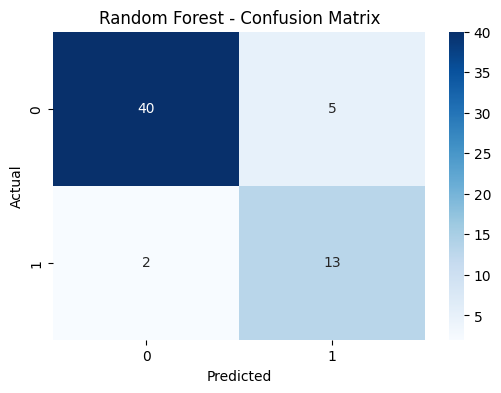

c:\Users\shvar\miniconda3\envs\survival_pred_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.8833333333333333
Classification Report - AdaBoost:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        45
           1       0.72      0.87      0.79        15

    accuracy                           0.88        60
   macro avg       0.84      0.88      0.85        60
weighted avg       0.89      0.88      0.89        60



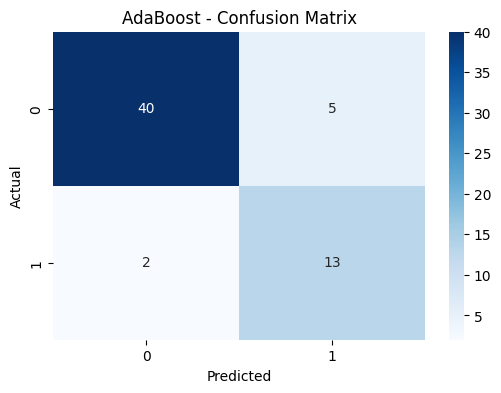

Gradient Boosting Accuracy: 0.8333333333333334
Classification Report - Gradient Boosting:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        45
           1       0.63      0.80      0.71        15

    accuracy                           0.83        60
   macro avg       0.78      0.82      0.79        60
weighted avg       0.85      0.83      0.84        60



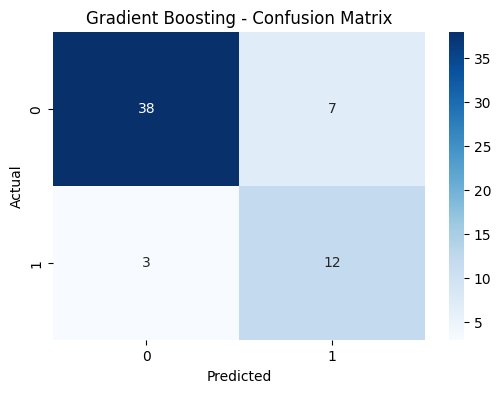

In [22]:
# Initialize base classifiers

# Random Forest

clf_rf = RandomForestClassifier(n_estimators=100, random_state=101)
clf_rf.fit(X_train, y_train)
# Model evaluation
y_pred = clf_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print("Classification Report - Random Forest:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

clf_ab = AdaBoostClassifier(n_estimators=100, random_state=101)
clf_ab.fit(X_train, y_train)
# Model evaluation
y_pred = clf_ab.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy:", accuracy)
print("Classification Report - AdaBoost:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

clf_gb = GradientBoostingClassifier(n_estimators=100, random_state=101)
clf_gb.fit(X_train, y_train)
# Model evaluation
y_pred = clf_gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Accuracy:", accuracy)
print("Classification Report - Gradient Boosting:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()





Random Forest is the best performing model as compared to other baselines. Therefore, the best performing model is further subjected to hyperparameter tuning to get obtain the best parameters for training.

In [86]:
param_grid = { 
    'n_estimators': [100, 130, 180, 300, 500],
    'max_depth' : [4, 5, 6, 7, 8, 10],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, n_estimators=130,
                                              random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'n_estimators': [100, 130, 180, 300, 500]})

Random Forest Accuracy: 0.9
Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        45
           1       0.76      0.87      0.81        15

    accuracy                           0.90        60
   macro avg       0.86      0.89      0.87        60
weighted avg       0.91      0.90      0.90        60



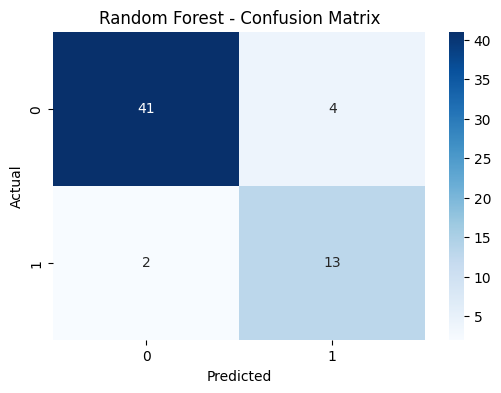

In [90]:
# Training the Random Forest model again with best parameters obtained from GridSearchCV

clf_rf = RandomForestClassifier(max_depth=10, n_estimators=130,
                       random_state=101, criterion='entropy')
clf_rf.fit(X_train, y_train)
# Model evaluation
y_pred = clf_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print("Classification Report - Random Forest:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Analysis the results:

**For label 0 (indicating patients who lived):**

Precision: 0.95
This indicates that out of all the instances classified as "patient lived," 95% were correctly classified.
Recall: 0.91
This suggests that out of all the instances of actual "patient lived," 91% were correctly identified by the model.


**For label 1 (indicating patients who died):**

Precision: 0.76
This indicates that out of all the instances classified as "patient died," 76% were correctly classified.
Recall: 0.87

This suggests that out of all the instances of actual "patient died," 87% were correctly identified by the model.

**Overall Analysis:**

* The model has achieved high precision and recall for predicting whether a patient lived or died. However, there is a notable difference in precision between the two classes, with lower precision for predicting patient dies (label 1). This suggests that the model may have more false positives for predicting patient dies compared to patient lived.
* The F1-score, which considers both precision and recall, indicates that the model performs well for predicting patient lived but relatively less so for predicting patient dies.
* The above behavior can be explained by the fact that, there are less number of patient medical records in the training process for label 1, that is, patient who dies during the follow-up period. This creates a bias when performing inference on held-out test set or new patient record.
* The accuracy of the model is 90%, indicating the overall correctness of the predictions across both classes.
* The model performance can be increased for both labels by adding more patient records or synthetic data.

